In [13]:
import pandas as pd
from ast import literal_eval
from shared_analysis_utils import strip_fs, strip_est

res_df = pd.read_csv(r"C:\Users\orenk\Desktop\Data\scc_res_df.csv",
    converters={"per_fold_score": literal_eval})
res_df

,model_type,agg_dim,conf,fs,est,res,c,pval,per_fold_score
0,actual,temporal,0,SelectKBest(k=13),RandomForestClassifier(n_estimators=50),0.718833,reward,0.012,"[0.8333333333333334, 0.6666666666666666, 0.833..."
1,dummy,temporal,0,SelectKBest(k=13),RandomForestClassifier(n_estimators=50),0.497046,reward,NaN,"[0.5785714285714285, 0.525, 0.5857142857142857..."
2,actual,temporal,1,SelectKBest(k=13),RandomForestClassifier(),0.721667,reward,0.010,"[0.8333333333333334, 0.6666666666666666, 0.666..."
3,dummy,temporal,1,SelectKBest(k=13),RandomForestClassifier(),0.500107,reward,NaN,"[0.525, 0.33214285714285713, 0.553571428571428..."
4,actual,temporal,2,SelectKBest(k=13),RandomForestClassifier(n_estimators=200),0.729500,reward,0.003,"[0.9166666666666666, 0.6666666666666666, 0.75,..."
...,...,...,...,...,...,...,...,...,...
195,dummy,temporal,47,PCA(n_components=24),LogisticRegression(max_iter=1000),0.501850,vision,NaN,"[0.4214285714285714, 0.43928571428571433, 0.55..."
196,actual,temporal,48,PCA(n_components=24),"LogisticRegression(C=0.2, max_iter=1000)",0.658083,vision,0.061,"[0.5833333333333334, 0.5833333333333334, 0.583..."
197,dummy,temporal,48,PCA(n_components=24),"LogisticRegression(C=0.2, max_iter=1000)",0.501732,vision,NaN,"[0.4214285714285714, 0.43928571428571433, 0.55..."
198,actual,temporal,49,PCA(n_components=24),"LogisticRegression(C=0.8, max_iter=1000)",0.661333,vision,0.058,"[0.5833333333333334, 0.6666666666666666, 0.583..."


In [14]:
import random
res_df["per_fold_score_balanced"] = [random.sample(x,1000) for x in res_df["per_fold_score"]]
res_df = res_df.explode('per_fold_score_balanced').rename({"per_fold_score_balanced" : "fold_acc",
                                                           "model_type" : "iter_type"}, axis=1)

In [15]:
df_to_viz = res_df[res_df.agg_dim == 'temporal'].rename({"c" : "roi"}, axis=1) #Shape of x is 36 (n_subjects) * 12031 (n_voxels) for spatial and 36X269 for temporal
df_to_viz

,iter_type,agg_dim,conf,fs,est,res,roi,pval,per_fold_score,fold_acc
0,actual,temporal,0,SelectKBest(k=13),RandomForestClassifier(n_estimators=50),0.718833,reward,0.012,"[0.8333333333333334, 0.6666666666666666, 0.833...",0.833333
0,actual,temporal,0,SelectKBest(k=13),RandomForestClassifier(n_estimators=50),0.718833,reward,0.012,"[0.8333333333333334, 0.6666666666666666, 0.833...",0.833333
0,actual,temporal,0,SelectKBest(k=13),RandomForestClassifier(n_estimators=50),0.718833,reward,0.012,"[0.8333333333333334, 0.6666666666666666, 0.833...",0.833333
0,actual,temporal,0,SelectKBest(k=13),RandomForestClassifier(n_estimators=50),0.718833,reward,0.012,"[0.8333333333333334, 0.6666666666666666, 0.833...",0.666667
0,actual,temporal,0,SelectKBest(k=13),RandomForestClassifier(n_estimators=50),0.718833,reward,0.012,"[0.8333333333333334, 0.6666666666666666, 0.833...",0.5
...,...,...,...,...,...,...,...,...,...,...
199,dummy,temporal,49,PCA(n_components=24),"LogisticRegression(C=0.8, max_iter=1000)",0.501425,vision,NaN,"[0.4214285714285714, 0.43928571428571433, 0.55...",0.603571
199,dummy,temporal,49,PCA(n_components=24),"LogisticRegression(C=0.8, max_iter=1000)",0.501425,vision,NaN,"[0.4214285714285714, 0.43928571428571433, 0.55...",0.532143
199,dummy,temporal,49,PCA(n_components=24),"LogisticRegression(C=0.8, max_iter=1000)",0.501425,vision,NaN,"[0.4214285714285714, 0.43928571428571433, 0.55...",0.467857
199,dummy,temporal,49,PCA(n_components=24),"LogisticRegression(C=0.8, max_iter=1000)",0.501425,vision,NaN,"[0.4214285714285714, 0.43928571428571433, 0.55...",0.328571


In [16]:

df_to_viz["fs"] = strip_fs(df_to_viz["fs"])
df_to_viz["est"] = strip_est(df_to_viz["est"])

<AxesSubplot: xlabel='roi', ylabel='fold_acc'>

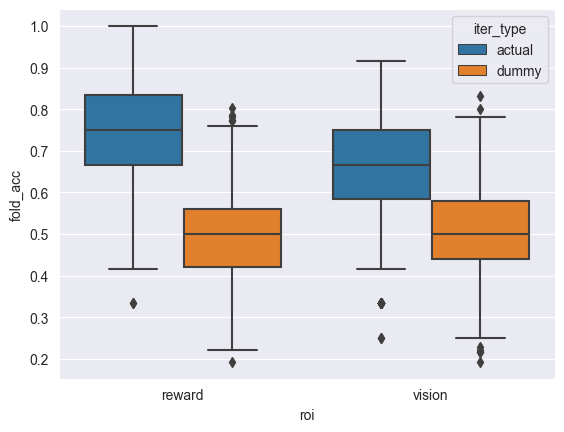

In [17]:
import seaborn as sns
df_to_viz = df_to_viz[(df_to_viz.fs == "PCA(20)") & (df_to_viz.est == "SVC('linear')")].reset_index(drop=True)
sns.boxplot(data = df_to_viz , x="roi", hue='iter_type', y='fold_acc')


roi : wilcoxon: z = 7916.0 , p = 1.062853275475725e-154 


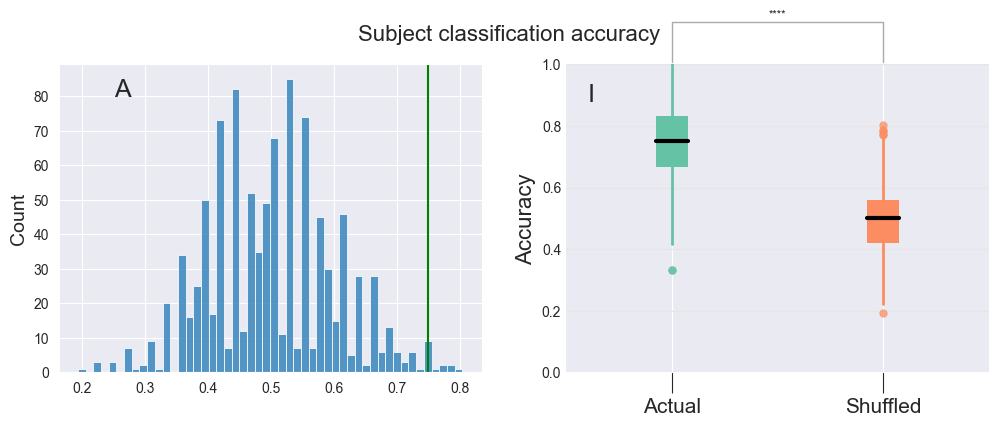

<Figure size 300x300 with 0 Axes>

For reward: Total 1000 random vec, rank of actual (0.7488333333333338) is 0.012 (12/1000)
roi : wilcoxon: z = 52038.5 , p = 1.5226994217735326e-103 


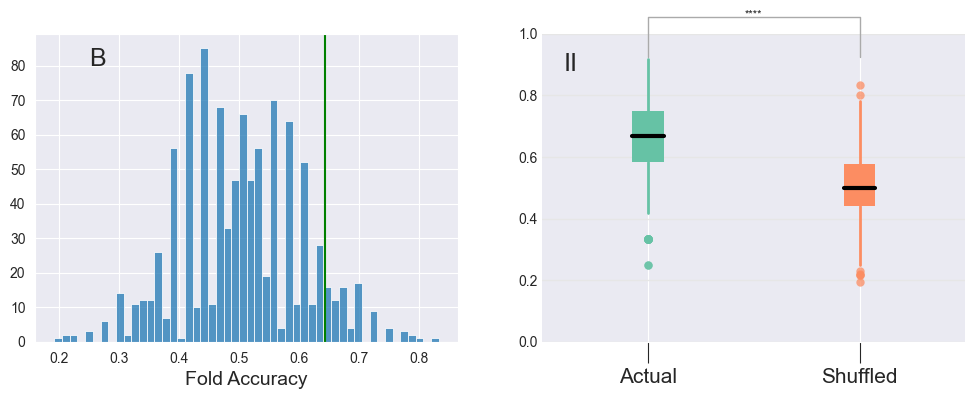

<Figure size 300x300 with 0 Axes>

For vision: Total 1000 random vec, rank of actual (0.6422500000000007) is 0.085 (85/1000)


In [18]:
from shared_analysis_utils import draw_stars_box
import matplotlib.pyplot as plt
# sns.set(font_scale=2)
ir = 0
for roi, df_chosen_roi in df_to_viz.groupby(["roi"]):
    fig, axs = plt.subplots(1, 2, figsize=(12,4))
    if ir == 0:
        fig.suptitle(f"Subject classification accuracy", fontsize = 16)
    null_dist = df_chosen_roi[df_chosen_roi.iter_type=='dummy'].fold_acc
    actual_dist = df_chosen_roi[df_chosen_roi.iter_type=='actual'].fold_acc
    actual_error = actual_dist.mean()

    sns.histplot(null_dist,  bins=50, ax = axs[0])
    axs[0].axvline(x=actual_error, color='green')
    axs[0].text(0.25, 80, ["A","B"][ir], fontsize=18)
    axs[0].set_xlabel('Fold Accuracy' if ir ==1 else "", fontsize = 14)
    axs[0].set_ylabel("Count" if ir==0 else "", fontsize = 14)

    s , sax = draw_stars_box(actual_dist, null_dist,
                   "wilcoxon", "roi", ylabel="Accuracy" if ir==0 else "", ax=axs[1], show=True,
                             ir = ir,
                             reverse_labels=False)
    if ir==0:
        sax.set_xlabel("", fontsize = 14)
        sax.yaxis.set_label_position("right")
        sax.yaxis.tick_right()

    actual_rank = [x for x in null_dist if x > actual_error]
    print(f"For {roi}: Total {len(null_dist)} random vec, rank of actual ({actual_error}) is {len(actual_rank)/len(null_dist)} ({len(actual_rank)}/{len(null_dist)})")
    ir+=1
# sns.set(font_scale=1)